In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import nltk

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

from Datasets import SequenceDataset
from models import NaiveBayes
from utility import top_k_metric

[nltk_data] Downloading package punkt to /Users/synch/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/synch/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/synch/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
train_ds = SequenceDataset(mode="train", tag_func=nltk.pos_tag_sents)
val_ds = SequenceDataset(mode="valid", tag_func=nltk.pos_tag_sents, input_tokenizer=train_ds.input_tokenizer, target_tokenizer=train_ds.target_tokenizer)
test_ds = SequenceDataset(mode="test", tag_func=nltk.pos_tag_sents, input_tokenizer=train_ds.input_tokenizer, target_tokenizer=train_ds.target_tokenizer)

In [3]:
train_data, train_labels = train_ds.get_data_target(data_type="tfidf")
val_data, val_labels = val_ds.get_data_target(data_type="tfidf")
test_data, test_labels = test_ds.get_data_target(data_type="tfidf")

finished loading corpus
finished loading descriptions
finished extracting contexts
finished extracting targets (OOCs)
finished loading corpus
finished loading descriptions
finished extracting contexts
finished extracting targets (OOCs)
finished loading corpus
finished loading descriptions
finished extracting contexts
finished extracting targets (OOCs)


## Setup Naive Bayes

In [4]:
NB = NaiveBayes()

train_pred = NB.train(train_data, train_labels)
val_pred = NB.infer(val_data)
test_pred = NB.infer(test_data)

In [5]:
val_top10 = np.argsort(val_pred, axis=-1)[:, ::-1][:, :10]

## Take a look at the predictions

In [6]:
for i in range(100):
    print(train_ds.target_tokenizer.sequences_to_texts(val_top10)[i])
    print(train_ds.target_tokenizer.sequences_to_texts(np.expand_dims(np.where(val_labels[i] == 1)[0], axis=-1)))
    print()

field.n.01 herd.n.01 forest.n.01 rock.n.01 zebra.n.01 pen.n.01 walk.n.01 beach.n.01 graze.n.02 standing.n.01
['hill.n.01']

assortment.n.01 counter.n.01 pile.n.01 piece.n.01 vegetable.n.01 ring.n.02 kitchen.n.01 food.n.01 one-half.n.01 tons.n.01
['fruit.n.01', 'cream.n.01', 'dessert.n.01']

life.n.02 room.n.01 picture.n.01 sofa.n.01 furniture.n.01 window.n.01 computer.n.01 couple.n.01 fire.n.01 topographic_point.n.01
['dog.n.01']

food.n.01 piece.n.01 tray.n.01 slice.n.01 dish.n.01 pizza.n.01 cut.n.01 sandwich.n.01 one-half.n.01 table.n.01
['broccoli.n.01', 'pan.n.01', 'carrot.n.01']

tennis.n.01 racket.n.04 woman.n.01 ball.n.01 man.n.01 court.n.01 player.n.01 person.n.01 image.n.01 photograph.n.01
['woman.n.01', 'water.n.01', 'racket.n.04', 'bottle.n.01']

couple.n.01 top.n.01 group.n.01 person.n.01 field.n.01 people.n.01 man.n.01 child.n.01 area.n.01 picture.n.01
['male_child.n.01']

man.n.01 air.n.01 group.n.01 field.n.01 game.n.01 person.n.01 work_force.n.01 front.n.01 people.n.01 

## Metric

In [11]:
for i in range(1, 11):
    metric = top_k_metric(train_pred, train_labels, i)
    print(f"top {i}: \nprecision: {metric[0]}\nrecall: {metric[1]}\nf1: {metric[2]}")

top 1: 
precision: 0.6744833991177154
recall: 0.3097840575846441
f1: 0.4245679418319997
top 2: 
precision: 0.5550267007197586
recall: 0.5098373766995468
f1: 0.5314731956757359
top 3: 
precision: 0.4563888243943967
recall: 0.6288456411623567
f1: 0.5289145009754019
top 4: 
precision: 0.3800499187369399
recall: 0.6982138096507597
f1: 0.492191464170942
top 5: 
precision: 0.32454144416066866
recall: 0.7452945881098374
f1: 0.45217953902143143
top 6: 
precision: 0.2822730438820525
recall: 0.7778725673153826
f1: 0.41423075284998373
top 7: 
precision: 0.25027364091678
recall: 0.8046387629965343
f1: 0.38179449230263246
top 8: 
precision: 0.22475040631530066
recall: 0.8258064516129032
f1: 0.35333705955490663
top 9: 
precision: 0.20390578644583754
recall: 0.8428685683817648
f1: 0.3283721606547502
top 10: 
precision: 0.18690503830972835
recall: 0.8584377499333511
f1: 0.3069736403069736


In [12]:
for i in range(1, 11):
    metric = top_k_metric(val_pred, val_labels, i)
    print(f"top {i}: \nprecision: {metric[0]}\nrecall: {metric[1]}\nf1: {metric[2]}")

top 1: 
precision: 0.19303201506591336
recall: 0.09322419281491587
f1: 0.12572830420116526
top 2: 
precision: 0.1492467043314501
recall: 0.14415643474306503
f1: 0.14665741383298636
top 3: 
precision: 0.12868801004394226
recall: 0.18644838562983174
f1: 0.1522748375116063
top 4: 
precision: 0.1141713747645951
recall: 0.22055479763528876
f1: 0.15045757716767486
top 5: 
precision: 0.10282485875706214
recall: 0.24829467939972716
f1: 0.14542548941270475
top 6: 
precision: 0.0938480853735091
recall: 0.2719417917235107
f1: 0.13954031034885078
top 7: 
precision: 0.08743610438525692
recall: 0.2955889040472942
f1: 0.13495276653171387
top 8: 
precision: 0.0826271186440678
recall: 0.31923601637107774
f1: 0.13127629733520338
top 9: 
precision: 0.07710818162795564
recall: 0.33515234197362437
f1: 0.12537211873777324
top 10: 
precision: 0.0724105461393597
recall: 0.3497044110959527
f1: 0.11997815742257587


In [16]:
f1 = []
precision = []
recall = []
for i in range(1, 11):
    metric = top_k_metric(test_pred, test_labels, i)
    precision.append(metric[0])
    recall.append(metric[1])
    f1.append(metric[2])
    print(f"top {i}: \nprecision: {metric[0]}\nrecall: {metric[1]}\nf1: {metric[2]}")

top 1: 
precision: 0.1977401129943503
recall: 0.09247027741083223
f1: 0.126012601260126
top 2: 
precision: 0.15207156308851225
recall: 0.14222809335094672
f1: 0.14698521046643911
top 3: 
precision: 0.12868801004394226
recall: 0.1805372082782915
f1: 0.15026571376214037
top 4: 
precision: 0.1111111111111111
recall: 0.20783795684720388
f1: 0.14480748581070715
top 5: 
precision: 0.09868173258003766
recall: 0.2307353588727433
f1: 0.13824033768632105
top 6: 
precision: 0.0903954802259887
recall: 0.2536327608982827
f1: 0.13328705310656022
top 7: 
precision: 0.08447672854452515
recall: 0.2765301629238221
f1: 0.12941782586295722
top 8: 
precision: 0.07815442561205273
recall: 0.29238221047996477
f1: 0.12333983468004087
top 9: 
precision: 0.07313245448838669
recall: 0.30779392338177014
f1: 0.11818412376363174
top 10: 
precision: 0.06911487758945387
recall: 0.3232056362835755
f1: 0.11387789930959585


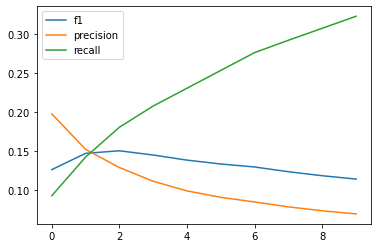

In [18]:
import matplotlib.pyplot as plt

plt.plot(f1, label="f1")
plt.plot(precision, label="precision")
plt.plot(recall, label="recall")

plt.legend();